Found 2446 images belonging to 7 classes.
Found 2443 images belonging to 7 classes.
Epoch 1/200
20/20 [==============================] - 392s 20s/step - loss: 2.7460 - acc: 0.1549 - val_loss: 2.2454 - val_acc: 0.1596
Epoch 2/200
20/20 [==============================] - 372s 19s/step - loss: 1.9897 - acc: 0.1783 - val_loss: 1.9109 - val_acc: 0.2133
Epoch 3/200
20/20 [==============================] - 372s 19s/step - loss: 1.8905 - acc: 0.2535 - val_loss: 2.3468 - val_acc: 0.2186
Epoch 4/200
20/20 [==============================] - 374s 19s/step - loss: 1.7388 - acc: 0.3144 - val_loss: 2.5644 - val_acc: 0.2824
Epoch 5/200
20/20 [==============================] - 372s 19s/step - loss: 1.5310 - acc: 0.4047 - val_loss: 3.3652 - val_acc: 0.2652
Epoch 6/200
20/20 [==============================] - 373s 19s/step - loss: 1.3125 - acc: 0.4849 - val_loss: 2.2829 - val_acc: 0.3332
Epoch 7/200
20/20 [==============================] - 370s 18s/step - loss: 1.1316 - acc: 0.5670 - val_loss: 2.1357 - v

20/20 [==============================] - 394s 20s/step - loss: 0.1649 - acc: 0.9669 - val_loss: 0.0337 - val_acc: 0.8666
Epoch 123/200
20/20 [==============================] - 367s 18s/step - loss: 0.1435 - acc: 0.9526 - val_loss: 1.1688 - val_acc: 0.8887
Epoch 124/200
20/20 [==============================] - 363s 18s/step - loss: 0.1002 - acc: 0.9693 - val_loss: 0.0941 - val_acc: 0.8944
Epoch 125/200
20/20 [==============================] - 367s 18s/step - loss: 0.0888 - acc: 0.9661 - val_loss: 0.3010 - val_acc: 0.9046
Epoch 126/200
20/20 [==============================] - 378s 19s/step - loss: 0.1221 - acc: 0.9644 - val_loss: 0.7698 - val_acc: 0.8031
Epoch 127/200
20/20 [==============================] - 372s 19s/step - loss: 0.2168 - acc: 0.9387 - val_loss: 1.3115 - val_acc: 0.7491
Epoch 128/200
20/20 [==============================] - 387s 19s/step - loss: 0.1359 - acc: 0.9526 - val_loss: 0.0016 - val_acc: 0.8269
Epoch 129/200
20/20 [==============================] - 381s 19s/step 

Epoch 183/200
20/20 [==============================] - 337s 17s/step - loss: 0.0522 - acc: 0.9816 - val_loss: 0.0012 - val_acc: 0.9128
Epoch 184/200
20/20 [==============================] - 337s 17s/step - loss: 0.0441 - acc: 0.9836 - val_loss: 0.2880 - val_acc: 0.8588
Epoch 185/200
20/20 [==============================] - 337s 17s/step - loss: 0.0533 - acc: 0.9849 - val_loss: 0.0162 - val_acc: 0.8993
Epoch 186/200
20/20 [==============================] - 338s 17s/step - loss: 0.0845 - acc: 0.9759 - val_loss: 0.7179 - val_acc: 0.8350
Epoch 187/200
20/20 [==============================] - 337s 17s/step - loss: 0.0719 - acc: 0.9751 - val_loss: 0.5898 - val_acc: 0.8932
Epoch 188/200
20/20 [==============================] - 337s 17s/step - loss: 0.1675 - acc: 0.9571 - val_loss: 1.3557 - val_acc: 0.8305
Epoch 189/200
20/20 [==============================] - 339s 17s/step - loss: 0.0992 - acc: 0.9681 - val_loss: 0.1799 - val_acc: 0.8776
Epoch 190/200
20/20 [==============================] - 

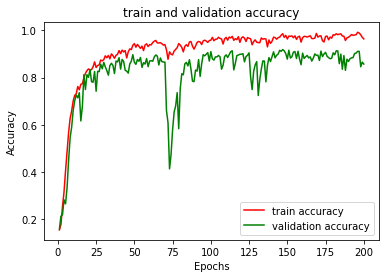

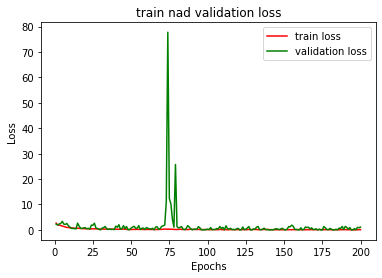

In [ ]:
from keras import layers
from keras import optimizers
from keras import Sequential
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.inception_v3 import InceptionV3
import os

conv_base = InceptionV3(include_top=False,
                        weights='imagenet',
                       input_shape=(150,150,3))

base_dir ='E:\\KDEF\\KDEF_localFace'
train_dir = os.path.join(base_dir,'KDEF_B')
validation_dir = os.path.join(base_dir,'KDEF_A')

batch_size = 128

train_datagen = ImageDataGenerator(
                rescale=1./255,
                rotation_range=40,
                width_shift_range=0.2,
                height_shift_range=0.2,
                shear_range=0.2,
                zoom_range=0.2,
                horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
                train_dir,
                target_size=(150,150),
                batch_size=batch_size)

validation_generator = test_datagen.flow_from_directory(
                validation_dir,
                target_size=(150,150),
                batch_size=batch_size)

model = Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(4048,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(4048,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(7,activation='softmax'))

steps_per_epoch = len(train_generator)
validation_steps = len(validation_generator)

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(lr=2e-4),
              metrics=['acc'])

model.save('inceptionV3_KEDF_localFace.h5')

history = model.fit_generator(
            train_generator,
            steps_per_epoch=steps_per_epoch,
            epochs=200,
            validation_data=validation_generator,
            validation_steps=validation_steps)

train_acc = history.history['acc']
train_loss = history.history['loss']
val_acc = history.history['val_acc']
val_loss = history.history['val_loss']

epoch = range(1,len(train_acc)+1)

plt.plot(epoch,train_acc,'r',label='train accuracy')
plt.plot(epoch,val_acc,'g',label='validation accuracy')
plt.title('train and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.figure()

plt.plot(epoch,train_loss,'r',label='train loss')
plt.plot(epoch,val_loss,'g',label='validation loss')
plt.title('train nad validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
